<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/SeriesdeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Anuncios de tv por hora
ads = pd.read_csv('https://bit.ly/2l9BdhA', index_col=['Time'], parse_dates=['Time'])

# Anuncio de tv por dia
cur = pd.read_csv('https://bit.ly/2lLao3B', index_col=['Time'], parse_dates=['Time'])

In [ ]:
print(ads.head())

                        Ads
Time                       
2017-09-13 00:00:00   80115
2017-09-13 01:00:00   79885
2017-09-13 02:00:00   89325
2017-09-13 03:00:00  101930
2017-09-13 04:00:00  121630


In [ ]:
print(cur.head())

            GEMS_GEMS_SPENT
Time                       
2017-05-01          1199436
2017-05-02          1045515
2017-05-03           586111
2017-05-04           856601
2017-05-05           793775


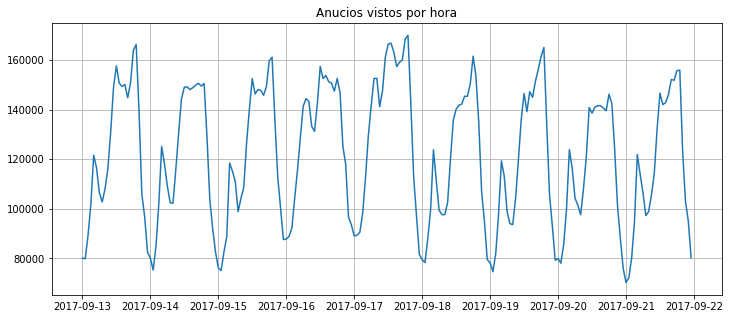

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(ads.Ads)
plt.title('Anucios vistos por hora')
plt.grid(True)
plt.show()

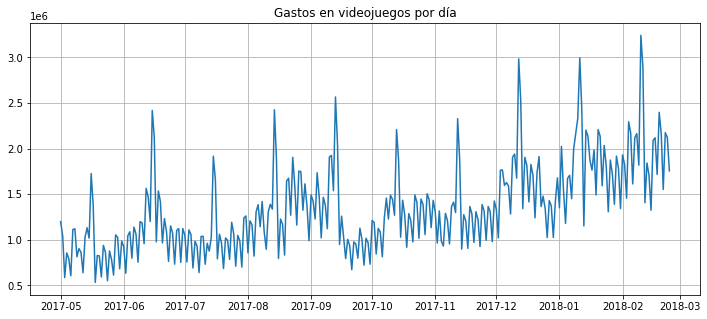

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(cur.GEMS_GEMS_SPENT)
plt.title('Gastos en videojuegos por día')
plt.grid(True)
plt.show()

In [ ]:
# Función de Autocorrelación 

data = sm.datasets.sunspots.load_pandas().data
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


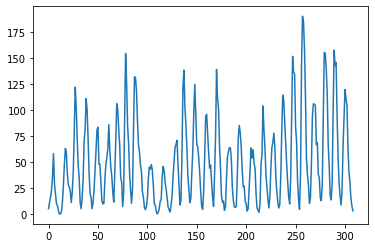

In [ ]:
data.SUNACTIVITY.plot()
plt.show()

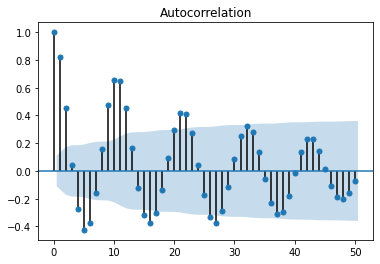

In [ ]:
# Fución:

sm.graphics.tsa.plot_acf(data.SUNACTIVITY.values, lags=50)
plt.show()
# Lags: retrasos para la media movil

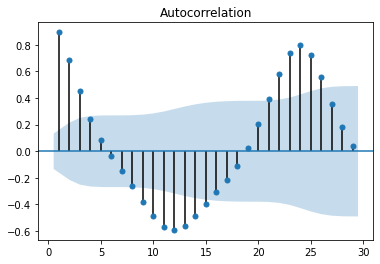

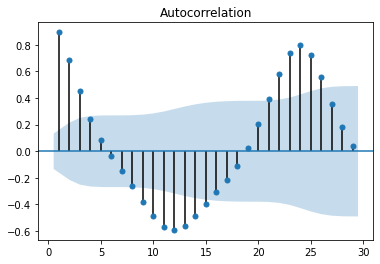

In [ ]:
# Ahora para nuesros conjuntos de datos

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ads.Ads, lags=range(1, 30))

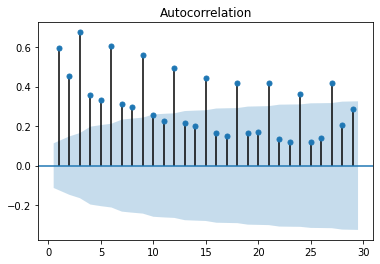

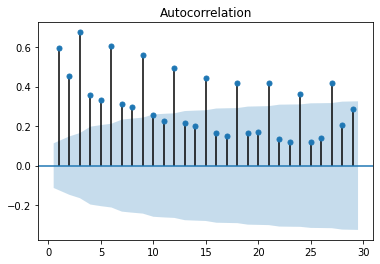

In [ ]:
plot_acf(cur.GEMS_GEMS_SPENT, lags=range(1, 30))

In [ ]:
# Metricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_error(y_true, y_pred):
  return np.mean(np.abs((y_true-y_pred)/y_true)) * 100

In [ ]:
# Media Movil

def moving_average(series, n):
  '''
  moving_average:
    Calcula la media movil de una serie de tiempo.
  ----
  Recibe:
    series: np.array con los datos de la serie
        n : el retraso (lag) de la ventana  para calcular la media móvil
  ----
  Regresa:
    Un escalar con los datos de la media para la ventana indicada 
  '''
  return np.average(series[-n:])



In [ ]:
def plotMA(series, window):
  rolling_mean = series.rolling(window=window).mean()
  plt.figure(figsize=(15, 5))
  plt.title('Media Movil \n tamaño de ventana = {}'.format(window))
  plt.plot(rolling_mean, 'g', label = 'Tendencia')
  # ---------
  plt.plot(series[window:], label='Valores reales')
  plt.legend(loc='upper left')
  plt.grid(True)

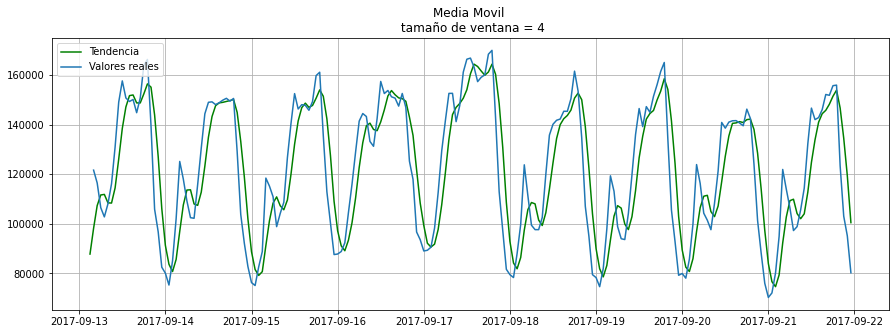

In [ ]:
plotMA(ads, 4)

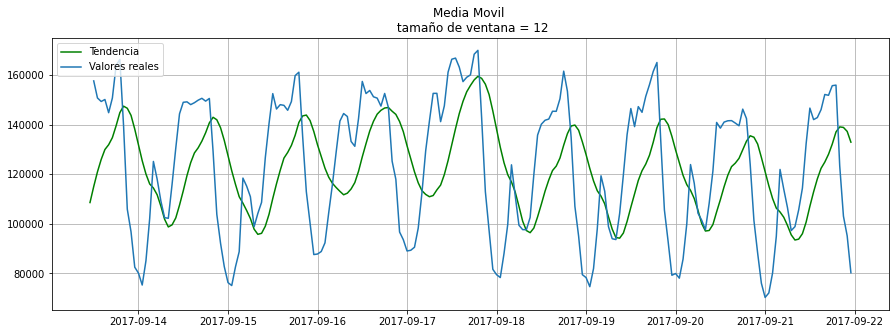

In [ ]:
plotMA(ads, 12)

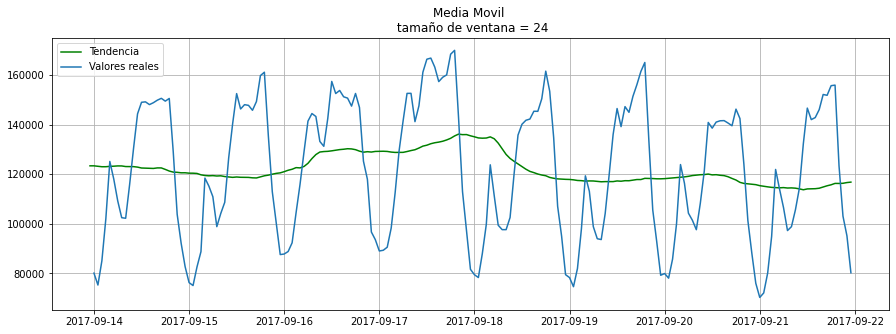

In [ ]:
plotMA(ads, 24)

In [ ]:
# Con parameros de connfianza:

def plotMA(series, window, plot_intervals = False, scale=1.96):
  rolling_mean = series.rolling(window=window).mean()
  plt.figure(figsize=(15, 5))
  plt.title('Media Movil \n tamaño de ventana = {}'.format(window))
  plt.plot(rolling_mean, 'g', label = 'Tendencia')
  #----------
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    dev = np.std(series[window:]-rolling_mean[window:])
    upper_ = rolling_mean + (mae + scale*dev)
    lower_ = rolling_mean - (mae + scale*dev)
    plt.plot(upper_, 'r--', label='Limite superior/inferior')
    plt.plot(lower_, 'r--')
  # ---------
  plt.plot(series[window:], label='Valores reales')
  plt.legend(loc='upper left')
  plt.grid(True)

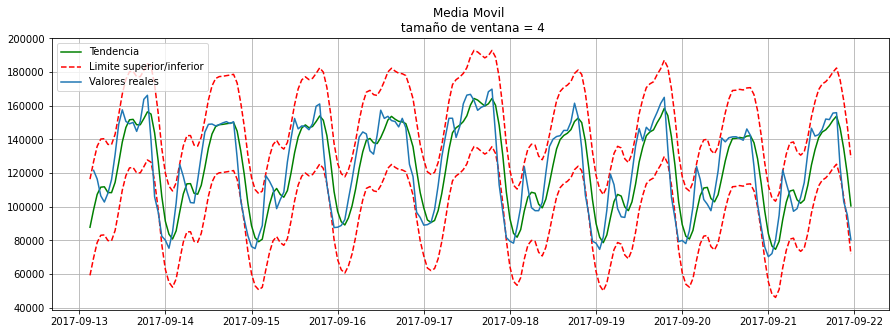

In [ ]:
plotMA(ads, 4, plot_intervals=True)

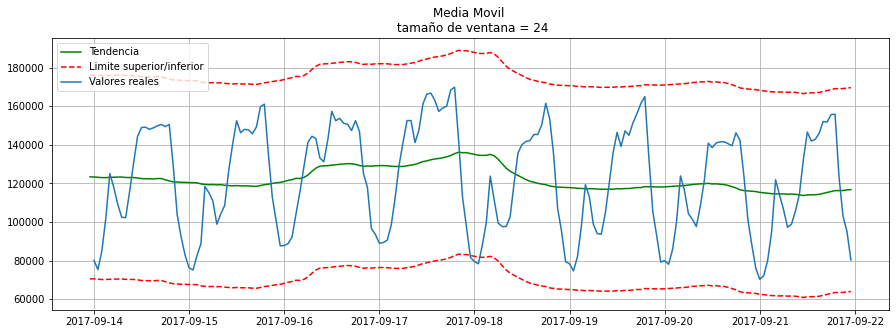

In [ ]:
plotMA(ads, 24, plot_intervals=True)

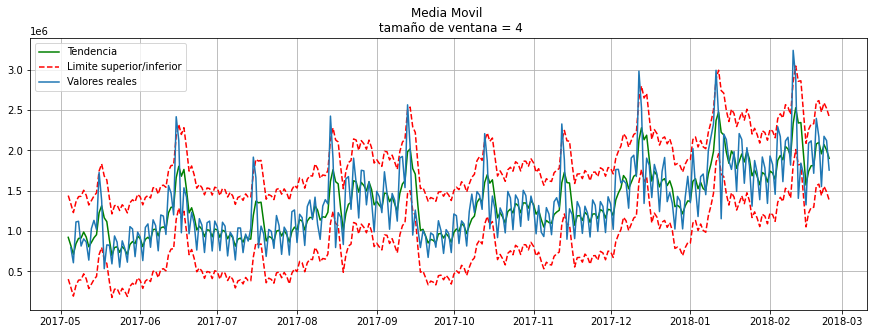

In [ ]:
# Otro conjunto de DATOS

plotMA(cur, 4, plot_intervals=True)

In [ ]:
# Veamos que hay algunos que se salen, pero necesitam os hacer zoom
# Muy cansado así que modificquemos nnuestra función:

def plotMA(series, window, plot_intervals = False, scale=1.96, plot_anomalies=False):
  rolling_mean = series.rolling(window=window).mean()
  plt.figure(figsize=(15, 5))
  plt.title('Media Movil \n tamaño de ventana = {}'.format(window))
  plt.plot(rolling_mean, 'g', label = 'Tendencia')
  #---------- Lineas de Error
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    dev = np.std(series[window:]-rolling_mean[window:])
    upper_ = rolling_mean + (mae + scale*dev)
    lower_ = rolling_mean - (mae + scale*dev)
    plt.plot(upper_, 'r--', label='Limite superior/inferior')
    plt.plot(lower_, 'r--')
  # --------- Anomalias
    if plot_anomalies:
      anomalies = pd.DataFrame(index=series.index, columns = series.columns)
      anomalies[series<lower_] = series[series<lower_]
      anomalies[series>upper_] = series[series>upper_]
      plt.plot(anomalies, 'ro', markersize=7)
  #------------
  plt.plot(series[window:], label='Valores reales')
  plt.legend(loc='upper left')
  plt.grid(True)

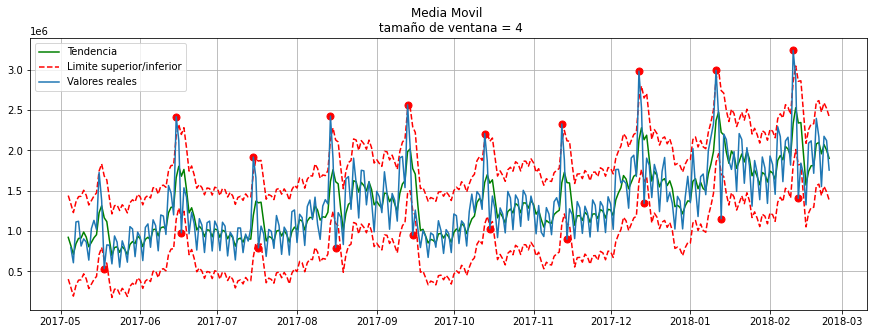

In [ ]:
plotMA(cur, 4, plot_intervals=True, plot_anomalies=True)

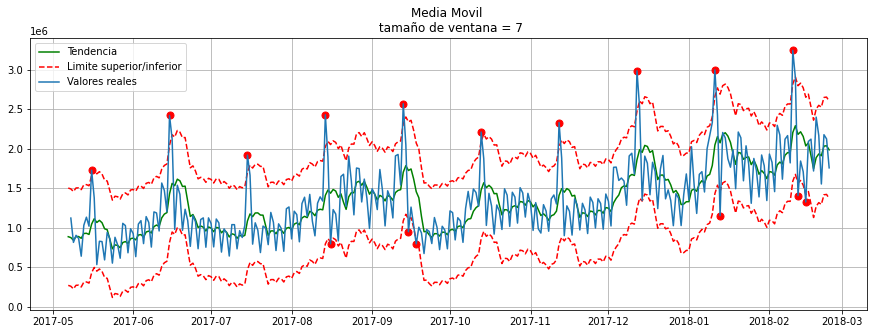

In [ ]:
plotMA(cur, 7, plot_intervals=True, plot_anomalies=True)

In [ ]:
# MEDIA MOVIL CON PESOS

def weighted_MA(series, weights):
  results = 0.0
  weights.reverse()
  for n in range(len(weights)):
    results += series.iloc[-n-1] * weights[n]
  return float(results)

In [ ]:
print(ads.tail(3))
weighted_MA(ads, [0.6, 0.3, 0.1])

                        Ads
Time                       
2017-09-21 21:00:00  103080
2017-09-21 22:00:00   95155
2017-09-21 23:00:00   80285


98423.0

In [ ]:
### ------------------------------------


def exp_smooth(series, alpha):
  res = [series[0]]
  for n in range(1, len(series)):
    res.append(alpha*series[n] + (1-alpha)*res[n-1])
  return res

In [ ]:
def plot_exp_smooth(series, alphas):
  with plt.style.context('seaborn-white'):
    plt.figure(figsize=(15, 7))
    for alpha in alphas:
      plt.plot(exp_smooth(series, alpha),
               label = 'Alpba {}'.format(alpha))
    plt.plot(series.values, 'c', label = 'Real')
    plt.legend(loc='best')
    plt.title('Suavizado exponencial')
    plt.grid(True)
    plt.show()

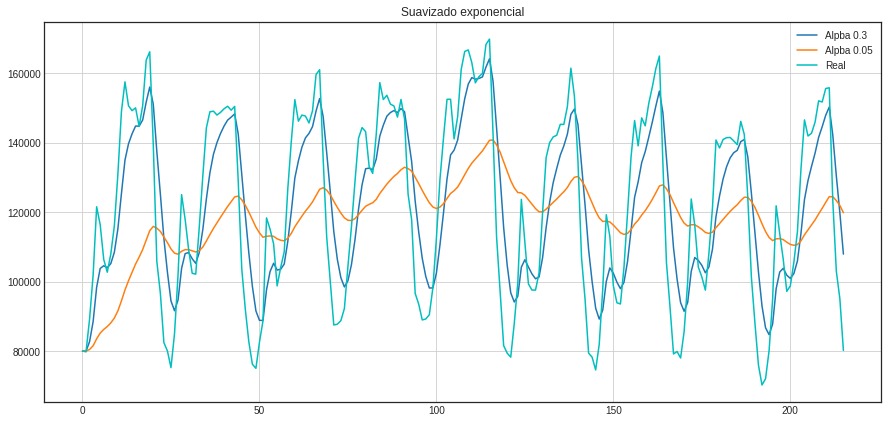

In [ ]:
plot_exp_smooth(ads.Ads, [0.3, 0.05])

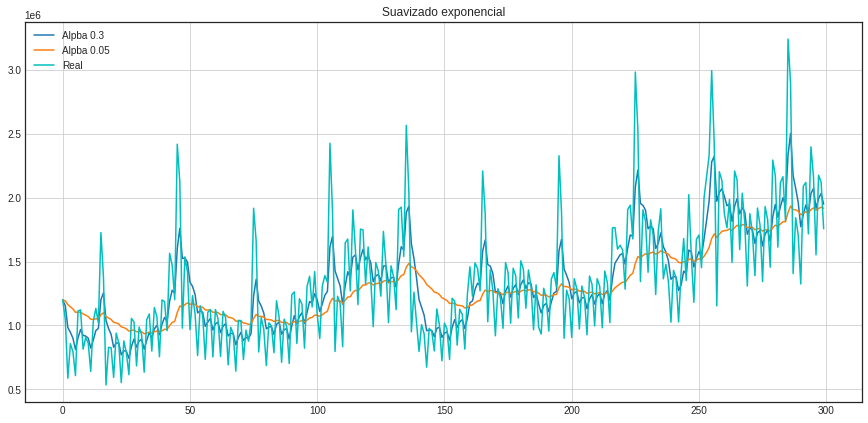

In [ ]:
plot_exp_smooth(cur.GEMS_GEMS_SPENT, [0.3, 0.05])

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

def plot_HW_1(series):
  ses1 = ExponentialSmoothing((series), seasonal_periods= 12,
                              trend = 'add', seasonal = 'add').fit()
  # PRONOSTICO
  ses2 = ses1.forecast(len(series)/3)
  series.plot(figsize = (15, 7))
  ses2.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


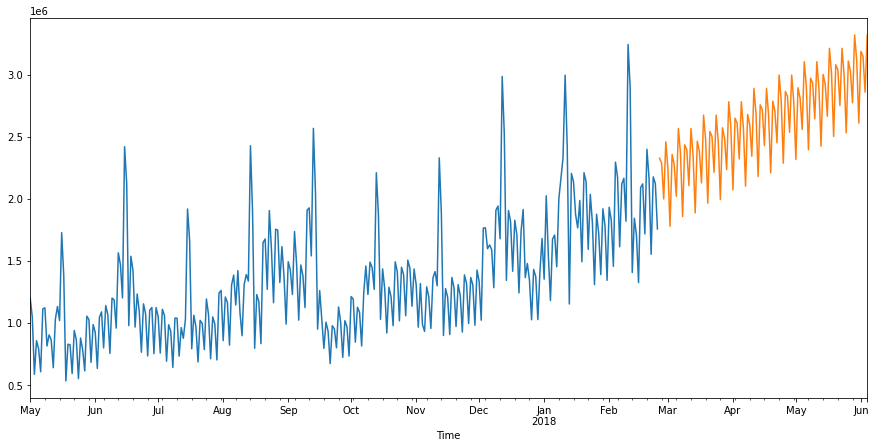

In [ ]:
plot_HW_1(cur.GEMS_GEMS_SPENT)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def plot_HW_2(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods=12).fit()
  #Forecast
  train, test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start=test.index[0], end = test.index[-1])
  plt.figure(figsize=(15, 7))
  plt.plot(train.index, train, label='Entrenamiento')
  plt.plot(test.index, test, label='Prueba')
  plt.plot(hw_p.index, hw_p, label='Predicción')
  plt.grid()
  plt.legend(loc='best')
  plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


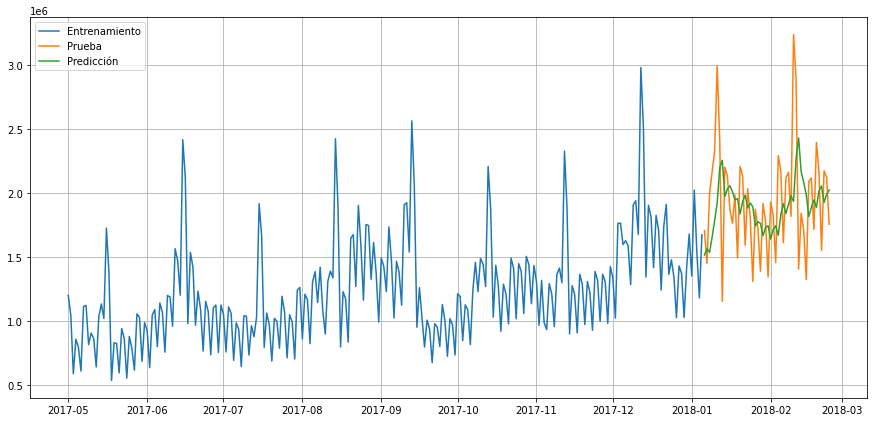

In [ ]:
plot_HW_2(cur.GEMS_GEMS_SPENT, 50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


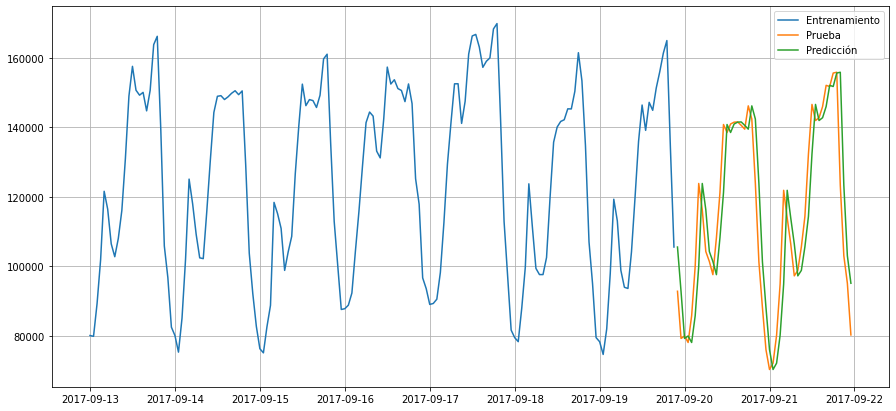

In [ ]:
plot_HW_2(ads.Ads, 50)